http://desktop.arcgis.com/en/arcmap/10.3/manage-data/geodatabases/raster-basics.htm

## Check for libraries

In [6]:
# Load relevant R packages

inLibraries = list('repr','rgdal','spdep','raster')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

## Reading Raster Data

There are various ways of working with raster data in R. Take a look at a .tif file in the dataset directory (nemo_weather/nemowx3.tif). In this case, the .tif raster represents variations in temperature over a region.

Of course, there are many different data formats for rendering raster data.  For further info about alternative raster formats see:

-http://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/supported-raster-dataset-file-formats.htm

## Accessing raster data

The raster() function (raster library) can be used to import raster data. The raster function requires a path to the data file followed by the file extension.

In [7]:
#path to raster data file
ras_name <- 'datasets/nemo_weather/nemowx3.tif' 

### Retrieving Summary Info

By calling the new raster dataset, basic summary info about the raster is provided:
1. number of rows, columns, and cells
2. the size of each cell
3. the geographic coordinates bounding the raster
4. the coordinate system
5. the path to the dataset
6. the range of values in the raster cells

In [8]:
#Read raster values
inRas <- raster(ras_name, values=TRUE)
inRas

class       : RasterLayer 
dimensions  : 35, 41, 1435  (nrow, ncol, ncell)
resolution  : 5000, 5000  (x, y)
extent      : 462749.5, 667749.5, 4332713, 4507713  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0 
data source : C:\Users\Jacky Zhao\Desktop\repos\R-Data\datasets\nemo_weather\nemowx3.tif 
names       : nemowx3 


Visualizing the Raster Data
The raster can then be visualized using the 'plot' function

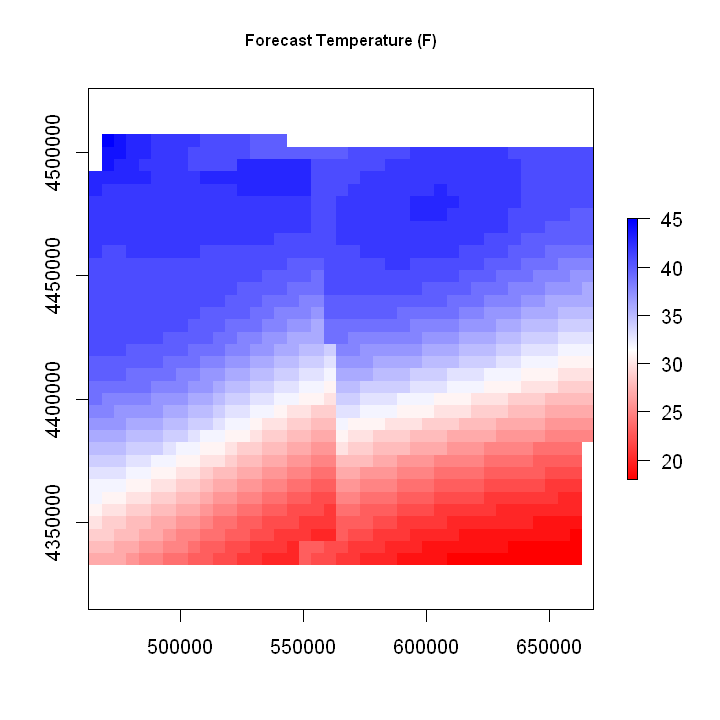

In [10]:
#Display the raster

plot(inRas, 
         col = colorRampPalette(c("red", "white", "blue"))(255),
         main='Forecast Temperature (F)',
         cex.main=.8)

## Working with raster files in R

The 'raster' function renders the dataset as a rasterlayer in R. The raster library provides many functionalities for accessing basic properties of a rasterlayer.

In [11]:
#Retrieve the number of cells, columns and rows in a rasterlayer
numcells <- ncell(inRas)
numcells

numcols <- ncol(inRas)
numcols

numrows <- nrow(inRas)
numrows

[1] 1435

[1] 41

[1] 35

The projection of the raster can be obtained by:

In [12]:
rasproj <- projection(inRas)
rasproj

[1] "+proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0"

getValues() and its shorthand function values() can be called to obtain a vector of all cell values in a raster.

In [15]:
#output a vector of the cell values in the raster

cellVector <- values(inRas) 
cellVector[0:50]

[1] NA 45 44 43 43 42 42 42 42 41 41 41 41 40 40 40 NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA 44 44 43 43 42 42 42 41

[1] 378

[1] 21

[1] 18

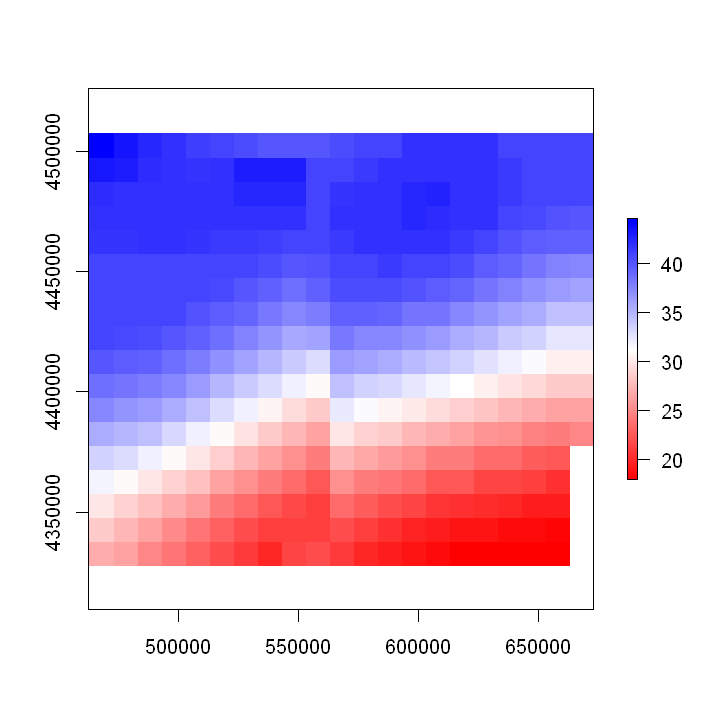

In [16]:
#The first feature in the spatialpolygonsdataframe can be accessed as follows

Ras2 <- aggregate(inRas,fact=2)
numcells <- ncell(Ras2)
numcells

numcols <- ncol(Ras2)
numcols

numrows <- nrow(Ras2)
numrows
plot(Ras2, col=colorRampPalette(c("red", "white", "blue"))(255))